['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


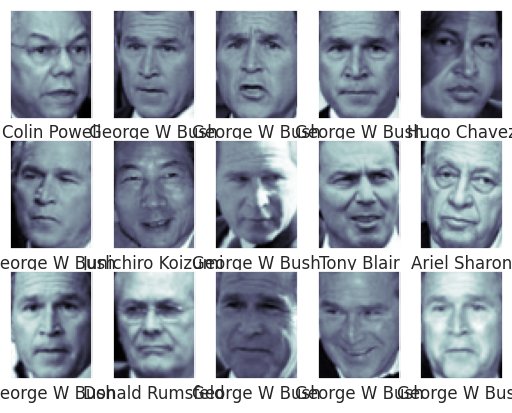

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

## ejemplo de las primeras 15 imagenes (de las 1348)
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

# INGENERIA DE VARIABLES
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

model.fit(Xtrain, ytrain)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(class_weight='balanced'))])

In [8]:
X_transformed = model.named_steps['pca'].transform(Xtrain)  # For training data
X_test_transformed = model.named_steps['pca'].transform(Xtest) # For test data

display(X_transformed)

array([[ 0.83448684, -0.28217024, -1.7494521 , ..., -2.58682   ,
        -1.2838973 , -0.18473281],
       [ 0.19567847,  0.03925931,  0.6410011 , ...,  2.1789014 ,
        -1.3786343 , -0.93323714],
       [ 0.02634658,  0.22049397,  1.0182585 , ..., -1.1664271 ,
        -1.4197559 ,  2.77779   ],
       ...,
       [ 0.46341088, -0.20825471, -0.8808636 , ...,  0.74984455,
        -1.663591  , -0.8831658 ],
       [ 0.5661642 ,  2.3017273 ,  0.8830336 , ..., -1.3500798 ,
         0.6534426 , -0.40230116],
       [ 0.21436623, -2.0857205 ,  0.21214588, ...,  0.4055863 ,
         1.3636972 ,  1.4793757 ]], dtype=float32)

In [4]:
## evaluamos a ver que tal nos ha ido el modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
predictions = model.predict(Xtest)
accuracy_score(predictions, ytest)


matrix = confusion_matrix(predictions, ytest)

print('matriz de confusion:')
print(matrix)


yfit = model.predict(Xtest)

matriz de confusion:
[[ 11   0   0   0   0   0   0   0]
 [  2  65   3  17   1   2   1   3]
 [  1   1  24   0   1   0   0   0]
 [  1   2   1 109   3   2   0   3]
 [  0   0   0   0  16   2   0   0]
 [  0   0   0   0   0  13   0   0]
 [  0   0   0   0   0   0  11   0]
 [  0   0   3   0   2   1   0  36]]


                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.73      0.85        15
     Colin Powell       0.69      0.96      0.80        68
  Donald Rumsfeld       0.89      0.77      0.83        31
    George W Bush       0.90      0.87      0.88       126
Gerhard Schroeder       0.89      0.70      0.78        23
      Hugo Chavez       1.00      0.65      0.79        20
Junichiro Koizumi       1.00      0.92      0.96        12
       Tony Blair       0.86      0.86      0.86        42

         accuracy                           0.85       337
        macro avg       0.90      0.81      0.84       337
     weighted avg       0.87      0.85      0.85       337



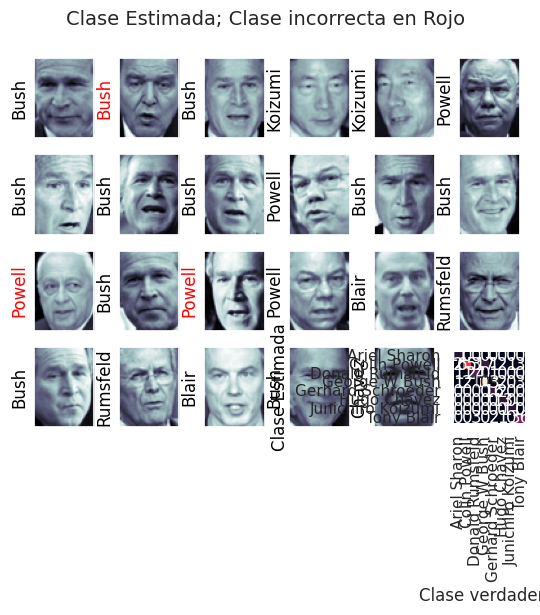

In [5]:

yfit = model.predict(Xtest)

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Clase Estimada; Clase incorrecta en Rojo ', size=14);


from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))


from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('Clase verdadera ')
plt.ylabel('Clase Estimada');

{'svc__C': 5, 'svc__gamma': 0.001}
                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



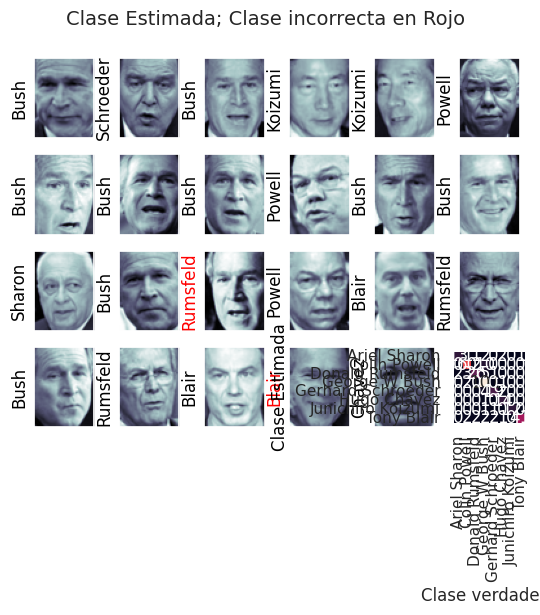

In [6]:
######## con un buen ordenador
## ahora intentamos tunear el algoritmo SVM

param_grid = {'svc__C': [1, 5, 10, 50, 100, 10000],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(Xtrain, ytrain)
print(grid.best_params_)

model = grid.best_estimator_
yfit = model.predict(Xtest)

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Clase Estimada; Clase incorrecta en Rojo ', size=14);


from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))


from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('Clase verdadera')
plt.ylabel('Clase Estimada');






